<a href="https://colab.research.google.com/github/NikhilGurrapu/Classification_Algorithms_On_WineQualityDataset/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required libraries

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Reading csv file

In [36]:
rdf = pd.read_csv('winequality-red.csv',sep=";")
wdf= pd.read_csv('winequality-white.csv',sep=";")
print(rdf.shape)
print(wdf.shape)

(1599, 12)
(4898, 12)


In [37]:
# makinf class label which are greater that 5 to 1 else 0
rdf['quality']=rdf['quality'].apply(lambda y_value: 1 if y_value>5 else 0)
wdf['quality']=wdf['quality'].apply(lambda y_value: 1 if y_value>5 else 0)

In [38]:
rdf.sample(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
237,7.2,0.645,0.0,1.9,0.097,15.0,39.0,0.99675,3.37,0.58,9.2,1


In [39]:
wdf.sample(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
382,7.5,0.35,0.28,9.6,0.051,26.0,157.0,0.9969,3.12,0.53,9.2,1


In [40]:
# Adding a new column to each dataset
rdf['c']='red'
wdf['c']='white'

In [41]:
rdf.sample(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,c
1593,6.8,0.62,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1,red


In [42]:
wdf.sample(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,c
3791,6.5,0.26,0.5,8.0,0.051,46.0,197.0,0.99536,3.18,0.47,9.5,0,white


In [43]:
# combining two datasets to make a new dataset called df
df = rdf.append(wdf, ignore_index = True)

<ipython-input-43-51919ab9c31a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = rdf.append(wdf, ignore_index = True)


In [44]:
# used One Hot Encoding on the 'color' column to convert categorical data into a numerical format that can be used in machine learning models
ohe = OneHotEncoder(drop='first')
df['color'] = ohe.fit_transform(df[['c']]).toarray()
df = df.drop(['c'], axis=1)
df.sample(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
5389,6.4,0.27,0.45,8.3,0.050,52.0,196.0,0.99550,3.18,0.48,9.5,0,1.0
2326,7.0,0.21,0.34,8.0,0.057,19.0,101.0,0.99540,2.99,0.59,9.4,0,1.0
5601,6.1,0.25,0.48,15.8,0.052,25.0,94.0,0.99782,3.07,0.45,9.2,1,1.0


In [45]:
df.shape

(6497, 13)

In [46]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0.633061,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.482007,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,0.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,1.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,1.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000,1.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 660.0 KB


In [48]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

# Removing Duplicated Rows from the dataset

In [49]:
print('Shape of the dataset BEFORE removing duplicated values: ',df.shape)
print('No of duplicated rows in dataset: ',df.duplicated().sum())
df.drop_duplicates(inplace=True)
print('Shape of the dataset AFTER removing duplicated values: ',df.shape)

Shape of the dataset BEFORE removing duplicated values:  (6497, 13)
No of duplicated rows in dataset:  1177
Shape of the dataset AFTER removing duplicated values:  (5320, 13)


# Relation between columns using Heatmap

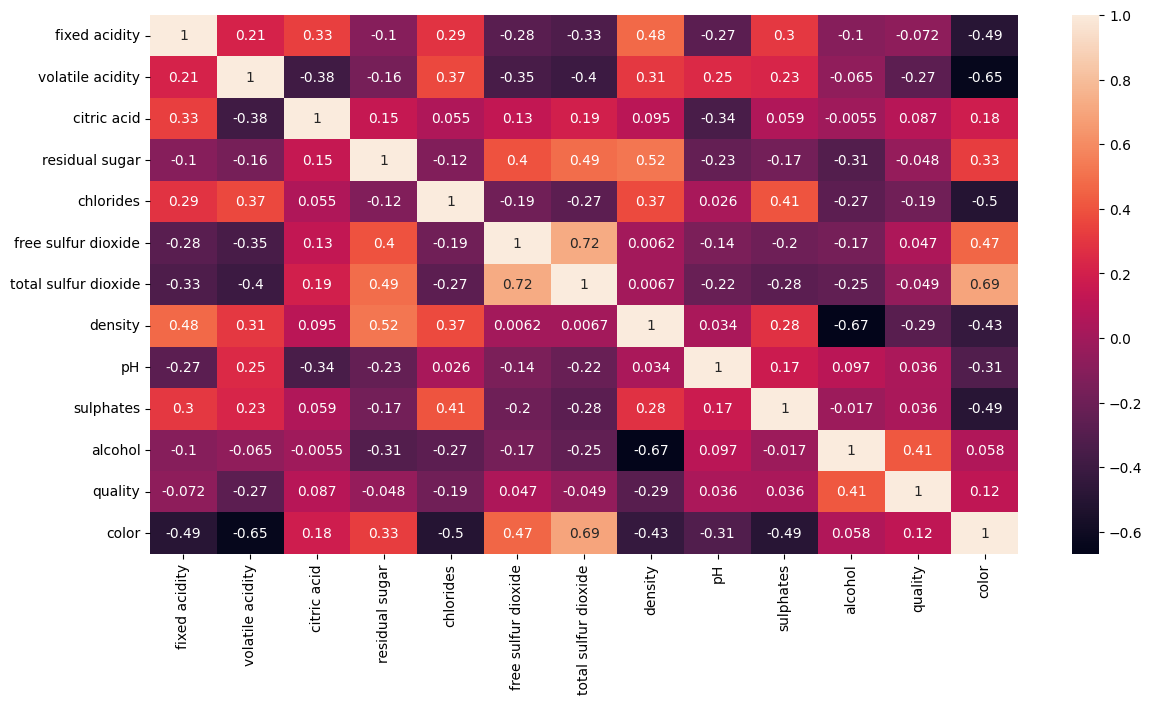

In [50]:
plt.figure(figsize=(14,7))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

1    3332
0    1988
Name: quality, dtype: int64 



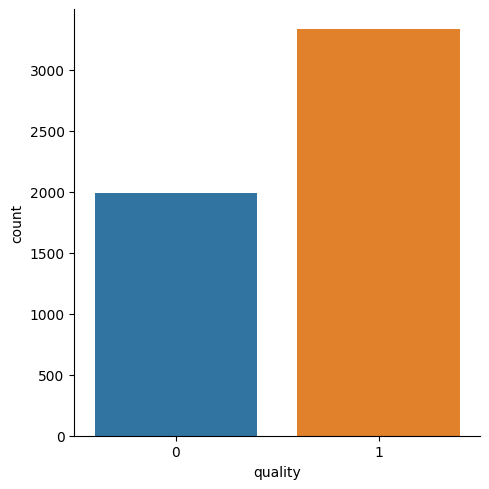

In [51]:
print(df['quality'].value_counts(),"\n")
sns.catplot(x='quality',data=df,kind='count')

1.0    3961
0.0    1359
Name: color, dtype: int64 



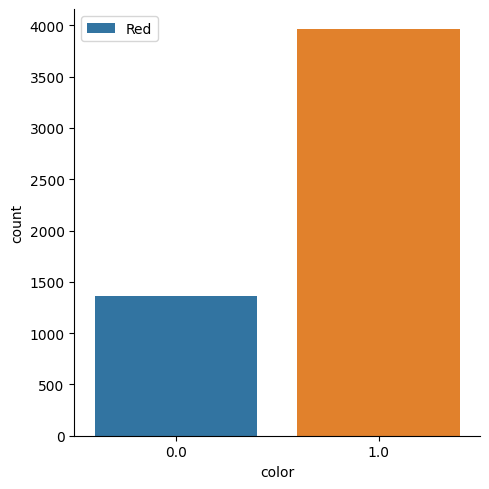

In [52]:
print(df['color'].value_counts(),"\n")
sns.catplot(x='color',data=df,kind='count')
plt.legend(labels=["Red","White"])
plt.show ()

In [53]:
df['quality'].value_counts()

1    3332
0    1988
Name: quality, dtype: int64

# Splitting up train and test set

In [54]:
X = df.drop(columns = ['quality'])
y = df['quality']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [56]:
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Model Building using Decision Tree Classifier

In [57]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[246, 147],
       [193, 478]])

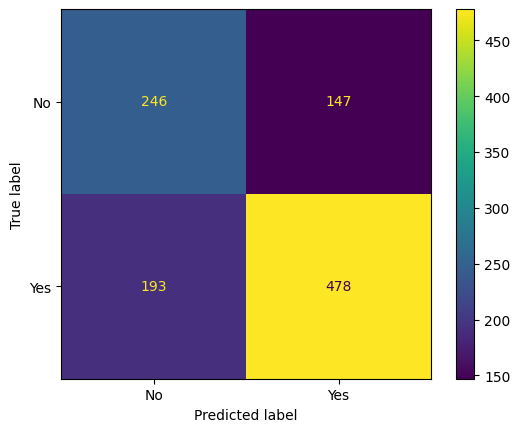

In [58]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No', 'Yes'])
cm_display.plot()
plt.show()

In [59]:
accuracy_score=(cm[0][0]+cm[1][1]) / (cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
error_rate=(1-accuracy_score)
precision=cm[1][1]/(cm[0][1]+cm[1][1])
recall=cm[1][1]/(cm[1][0]+cm[1][1])
specificity=cm[0][0]/(cm[0][0]+cm[0][1])
f1_score=(2 * precision * recall) / (precision + recall)

d=[accuracy_score,error_rate,precision,recall,specificity,f1_score]
compare = pd.DataFrame(d,columns=['Decision Tree Classifier'], index=['Accuracy_Score','Error_Rate','Precision','Recall','Specificity','F1-score'])

# Model Building using Naive Bayes (GaussianNB)

In [60]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[207, 186],
       [174, 497]])

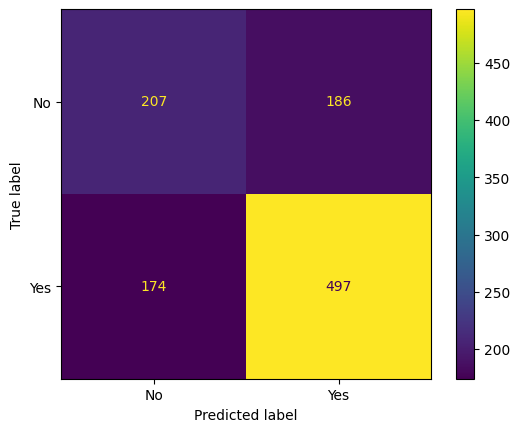

In [61]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No', 'Yes'])
cm_display.plot()
plt.show()

In [62]:
accuracy_score=(cm[0][0]+cm[1][1]) / (cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
error_rate=(1-accuracy_score)
precision=cm[1][1]/(cm[0][1]+cm[1][1])
recall=cm[1][1]/(cm[1][0]+cm[1][1])
specificity=cm[0][0]/(cm[0][0]+cm[0][1])
f1_score=(2 * precision * recall) / (precision + recall)

d=[accuracy_score,error_rate,precision,recall,specificity,f1_score]
compare['Naive Bayes']=d

# Model Building using Logistic Regression

In [63]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[232, 161],
       [101, 570]])

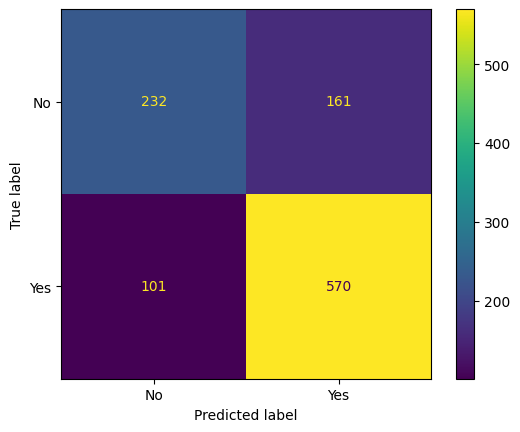

In [64]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No', 'Yes'])
cm_display.plot()
plt.show()

In [65]:
accuracy_score=(cm[0][0]+cm[1][1]) / (cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
error_rate=(1-accuracy_score)
precision=cm[1][1]/(cm[0][1]+cm[1][1])
recall=cm[1][1]/(cm[1][0]+cm[1][1])
specificity=cm[0][0]/(cm[0][0]+cm[0][1])
f1_score=(2 * precision * recall) / (precision + recall)

d=[accuracy_score,error_rate,precision,recall,specificity,f1_score]
compare['Logistics Regression']=d
compare

,Decision Tree Classifier,Naive Bayes,Logistics Regression
Accuracy_Score,0.680451,0.661654,0.753759
Error_Rate,0.319549,0.338346,0.246241
Precision,0.764800,0.727672,0.779754
Recall,0.712370,0.740686,0.849478
Specificity,0.625954,0.526718,0.590331
F1-score,0.737654,0.734121,0.813124


In [66]:
#                                  >5                              >6
#without scaling      0.671992	0.664474	0.737782    0.765038	0.744361	0.802632
#StandardScaler       0.657895	0.661654	0.753759    0.753759	0.742481	0.813910
#MinMaxScaler         0.586466	0.623120	0.741541    0.714286	0.784774	0.808271